<a href="https://colab.research.google.com/github/s-c-soma/AdvanceDataMining-CMPE-256/blob/main/assignments/CMPE256_Assignment_13_Apriori_Market_Basket_Item_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page Rank

In [ ]:
import pandas as pd
  
# create an Empty DataFrame
# object With column names only

In [ ]:
A = 0.2 
B = 0.2 
C = 0.2 
D = 0.2 
E = 0.2
N = 5
d = 0.85



Empty DataFrame
Columns: [iteration, A, B, C, D, E]
Index: []


In [ ]:
df = pd.DataFrame(columns = ['iteration', 'PR(A)', 'PR(B)','PR(C)','PR(D)','PR(E)'])
print(df)
for i in range(1,9):
  At = (1 - d) / N + d * (B + C / 4 + D / 4 + E)
  Bt = (1 - d) / N + d * (C / 4 + D / 4)
  Ct = (1 - d) / N + d * (D / 4)
  Dt = (1 - d) / N
  Et = (1 - d) / N + d * (D / 4)
  df.loc[i] = [i, At, Bt, Ct, Dt, Et]
  print("iteration= ", i)
  # print("df=",df.iloc[i])
  print("df=",df)
  A = At 
  B = Bt 
  C = Ct 
  D = Dt 
  E = Et
  print("##############")

Empty DataFrame
Columns: [iteration, PR(A), PR(B), PR(C), PR(D), PR(E)]
Index: []
iteration=  1
df=    iteration     PR(A)     PR(B)     PR(C)  PR(D)     PR(E)
1        1.0  0.112512  0.044105  0.036375   0.03  0.036375
##############
iteration=  2
df=    iteration     PR(A)     PR(B)     PR(C)  PR(D)     PR(E)
1        1.0  0.112512  0.044105  0.036375   0.03  0.036375
2        2.0  0.112512  0.044105  0.036375   0.03  0.036375
##############
iteration=  3
df=    iteration     PR(A)     PR(B)     PR(C)  PR(D)     PR(E)
1        1.0  0.112512  0.044105  0.036375   0.03  0.036375
2        2.0  0.112512  0.044105  0.036375   0.03  0.036375
3        3.0  0.112512  0.044105  0.036375   0.03  0.036375
##############
iteration=  4
df=    iteration     PR(A)     PR(B)     PR(C)  PR(D)     PR(E)
1        1.0  0.112512  0.044105  0.036375   0.03  0.036375
2        2.0  0.112512  0.044105  0.036375   0.03  0.036375
3        3.0  0.112512  0.044105  0.036375   0.03  0.036375
4        4.0  0.11251

In [ ]:
df

,iteration,A,B,C,D,E
1,1.0,0.112512,0.044105,0.036375,0.03,0.036375
2,2.0,0.112512,0.044105,0.036375,0.03,0.036375
3,3.0,0.112512,0.044105,0.036375,0.03,0.036375
4,4.0,0.112512,0.044105,0.036375,0.03,0.036375
5,5.0,0.112512,0.044105,0.036375,0.03,0.036375
6,6.0,0.112512,0.044105,0.036375,0.03,0.036375
7,7.0,0.112512,0.044105,0.036375,0.03,0.036375
8,8.0,0.112512,0.044105,0.036375,0.03,0.036375


In [ ]:
double A = 0.2, B = 0.2, C = 0.2, D = 0.2, E = 0.2;
	int N = 5;
	double d = 0.85;
	cout << "iteration: " << 0 <<"   "<<  "At" <<"  " << "  " << "Bt" << "   " << "Ct" << "   " << "Dt" << "   " << "Et" << endl;
	for (int i = 1; i <= 8; ++i) {
		double At = (1 - d) / N + d * (B + C / 4 + D / 4 + E);
		double Bt = (1 - d) / N + d * (C / 4 + D / 4);
		double Ct = (1 - d) / N + d * (D / 4);
		double Dt = (1 - d) / N;
		double Et = (1 - d) / N + d * (D / 4);
		
		cout << "iteration: " << i <<" "<< At << " " << Bt << " " << Ct << " " << Dt << " " << Et << endl;
		A = At, B = Bt, C = Ct, D = Dt, E = Et;
	}

# CMPE256_Assignment_13: Market Basket Item - Apriori Algorithm Dataset from real-world retailer

## **Importing required libraries.**

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=1ec895e96d3040f16315be93f26441f16809e91554603f7fc94e2ca5c0396d14
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from apyori import apriori

## **Loading the Dataset**

* Dataset: Excel Dataset contains Order ID, User ID, Product Item name.

* Consider Order ID as Transaction ID and group items by order id. 

* Generate Association rules MIN_SUP: 0.0045

In [ ]:
train_data = pd.read_csv('TRAIN-ARULES.csv')

print("Dataset loaded successfully")
train_data.head(2)

Dataset loaded successfully


,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis


In [ ]:
train_data.shape

(12963, 3)

In [ ]:
test_data = pd.read_csv('testarules.csv')

print("Test Dataset loaded successfully")
test_data

Test Dataset loaded successfully


,Item1,Item2,Item3,Item4,Item5
0,Dark Chocolate Minis,Organic Pink Lemonade Bunny Fruit Snacks,Peach-Pear Sparkling Water,NaN,NaN


In [ ]:
test_data.shape

(1, 5)

# Prepare Data

In [ ]:
train_data.shape[0]

12963

In [ ]:
train_data.head(2)

,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis


In [ ]:
import collections

In [ ]:
records = collections.defaultdict(list)

for row in train_data.itertuples():
    # print(row.order_id)
    # print(row.product_name)
    records[row.order_id].append(row.product_name)

In [ ]:
records[train_data.shape[0] +1]= ['Dark Chocolate Minis', 'Organic Pink Lemonade Bunny Fruit Snacks', 'Peach-Pear Sparkling Wate' ,'nan' ,'nan']

In [ ]:
records

defaultdict(list,
            {1483: ['Organic Pink Lemonade Bunny Fruit Snacks',
              'Dark Chocolate Minis',
              'Sparkling Water, Natural Mango Essenced',
              'Peach-Pear Sparkling Water',
              'Organic Heritage Flakes Cereal',
              'Popped Salted Caramel Granola Bars',
              'Healthy Grains Granola Bar, Vanilla Blueberry',
              'Flax Plus Organic Pumpkin Flax Granola',
              'Sweet & Salty Nut Almond Granola Bars',
              'Cool Mint Chocolate Energy Bar',
              'Chocolate Chip Energy Bars',
              'Trail Mix Fruit & Nut Chewy Granola Bars'],
             4595: ['Creme De Menthe Thins',
              'Milk Chocolate English Toffee Miniatures Candy Bars',
              "Baker's Pure Cane Ultrafine Sugar",
              'Plain Bagels',
              'Cinnamon Bread'],
             7099: ['Revive Zero Vitamin Water',
              'VitaminWater Zero™ XXX Acai Blueberry Pomegranate',
          

# Generate Rules

In [ ]:
association_rules = apriori(records.values(), min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(association_results)

print("items\n")

[RelationRecord(items=frozenset({'Apples', '0% Greek Strained Yogurt'}), support=0.006342494714587738, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0% Greek Strained Yogurt'}), items_add=frozenset({'Apples'}), confidence=0.6428571428571429, lift=41.464285714285715), OrderedStatistic(items_base=frozenset({'Apples'}), items_add=frozenset({'0% Greek Strained Yogurt'}), confidence=0.40909090909090906, lift=41.464285714285715)]), RelationRecord(items=frozenset({'Bag of Organic Bananas', '0% Greek Strained Yogurt'}), support=0.007047216349541931, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0% Greek Strained Yogurt'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.7142857142857143, lift=5.391337386018237)]), RelationRecord(items=frozenset({'Soda', '0% Greek Strained Yogurt'}), support=0.006342494714587738, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0% Greek Strained Yogurt'}), items_add=frozenset({'Soda'}), confidence=0.642857142

In [ ]:
print(len(association_results))
print(association_results[0])

986
RelationRecord(items=frozenset({'Apples', '0% Greek Strained Yogurt'}), support=0.006342494714587738, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0% Greek Strained Yogurt'}), items_add=frozenset({'Apples'}), confidence=0.6428571428571429, lift=41.464285714285715), OrderedStatistic(items_base=frozenset({'Apples'}), items_add=frozenset({'0% Greek Strained Yogurt'}), confidence=0.40909090909090906, lift=41.464285714285715)])


In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Apples -> 0% Greek Strained Yogurt
Support: 0.006342494714587738
Confidence: 0.6428571428571429
Lift: 41.464285714285715
Rule: Bag of Organic Bananas -> 0% Greek Strained Yogurt
Support: 0.007047216349541931
Confidence: 0.7142857142857143
Lift: 5.391337386018237
Rule: Soda -> 0% Greek Strained Yogurt
Support: 0.006342494714587738
Confidence: 0.6428571428571429
Lift: 12.327220077220078
Rule: 100% Premium Select Not From Concentrate Pure Prune Juice -> Natural Artesian Bottled Water
Support: 0.007751937984496124
Confidence: 0.846153846153846
Lift: 22.654571843251084
Rule: Reduced Fat Milk -> 100% Premium Select Not From Concentrate Pure Prune Juice
Support: 0.004933051444679351
Confidence: 0.5384615384615384
Lift: 21.830769230769228
Rule: 1500 Pale Ale -> Jaipur Karhi Organic Potato Dumplings in Spicy Buttermilk
Support: 0.004933051444679351
Confidence: 0.3333333333333333
Lift: 67.57142857142857
Rule: 80  Vodka Holiday Edition -> Jalapeno Pepper
Support: 0.008456659619450317
Confid

# Prediction

In [ ]:
predict = ['Dark Chocolate Minis', 'Organic Pink Lemonade Bunny Fruit Snacks', 'Peach-Pear Sparkling Wate']
# predict_set = {'Dark Chocolate Minis', 'Organic Pink Lemonade Bunny Fruit Snacks', 'Peach-Pear Sparkling Wate'}

for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    
    # print("pair=", pair)
    items = [x for x in pair]
    # print("items=", items)
    # if 'Dark Chocolate Minis' in pair or 'Organic Pink Lemonade Bunny Fruit Snacks' in pair or 'Peach-Pear Sparkling Wate' in pair:
    if items[0] in predict:
    
      print("Rule: " + items[0] + " -> " + items[1])

      #second index of the inner list
      print("Support: " + str(item[1]))

      #third index of the list located at 0th
      #of the third index of the inner list

      print("Confidence: " + str(item[2][0][2]))
      print("Lift: " + str(item[2][0][3]))
      print("=====================================")

In [ ]:
predict = {'Dark Chocolate Minis', 'Organic Pink Lemonade Bunny Fruit Snacks', 'Peach-Pear Sparkling Wate'}

for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    if predict.intersection(pair):
      print("pair=", pair)
      items = [x for x in pair]
      
      print("Rule: " + items[0] + " -> " + items[1])

      #second index of the inner list
      print("Support: " + str(item[1]))

      #third index of the list located at 0th
      #of the third index of the inner list

      print("Confidence: " + str(item[2][0][2]))
      print("Lift: " + str(item[2][0][3]))
      print("=====================================")

pair= frozenset({'Dark Chocolate Minis', 'Crunch Chocolate Peanut Butter Granola Bar'})
Rule: Dark Chocolate Minis -> Crunch Chocolate Peanut Butter Granola Bar
Support: 0.01127554615926709
Confidence: 0.7272727272727273
Lift: 33.29032258064517
pair= frozenset({'Crunch Chocolate Peanut Butter Granola Bar', 'Organic Pink Lemonade Bunny Fruit Snacks'})
Rule: Crunch Chocolate Peanut Butter Granola Bar -> Organic Pink Lemonade Bunny Fruit Snacks
Support: 0.01127554615926709
Confidence: 0.7272727272727273
Lift: 34.4
pair= frozenset({'Dark Chocolate Minis', 'Crunch Granola Bar Chocolate Chip'})
Rule: Dark Chocolate Minis -> Crunch Granola Bar Chocolate Chip
Support: 0.005637773079633545
Confidence: 1.0
Lift: 45.774193548387096
pair= frozenset({'Dark Chocolate Minis', 'Crunch White Chocolate Macadamia Nut Granola Bars'})
Rule: Dark Chocolate Minis -> Crunch White Chocolate Macadamia Nut Granola Bars
Support: 0.004933051444679351
Confidence: 1.0
Lift: 45.774193548387096
pair= frozenset({'Dark 

# Association Rule: Assignment 12

https://predictivehacks.com/a-tutorial-about-market-basket-analysis-in-python/

In [ ]:
market  = pd.read_csv("market.csv", sep=";")
market

,transaction_id,items
0,t1,"noodles, pickles,milk"
1,t2,"noodles,cheese"
2,t3,"cheese, shoes"
3,t4,"noodles, pickles, cheese"
4,t5,"noodles, pickles, clothes, cheese, milk"
5,t6,"pickles, clothes, milk"
6,t7,"pickles, milk, clothes"


## Method-1

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder


# get all the transcactions as a list
transcactions = list(market['items'].apply(lambda x: sorted(x.split(','))))


# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)

onehot = encoder.transform(transcactions)

# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.3, max_len = 3,  use_colnames=True) #max_len = 3, min_confidence=0.8,

# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1) #condifence

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( milk),( clothes),0.428571,0.428571,0.428571,1.00,2.333333,0.244898,inf
1,( clothes),( milk),0.428571,0.428571,0.428571,1.00,2.333333,0.244898,inf
2,( clothes),( pickles),0.428571,0.714286,0.428571,1.00,1.400000,0.122449,inf
3,( pickles),( clothes),0.714286,0.428571,0.428571,0.60,1.400000,0.122449,1.428571
4,( milk),( pickles),0.428571,0.714286,0.428571,1.00,1.400000,0.122449,inf
5,( pickles),( milk),0.714286,0.428571,0.428571,0.60,1.400000,0.122449,1.428571
6,( pickles),( noodles),0.714286,0.571429,0.428571,0.60,1.050000,0.020408,1.071429
7,( noodles),( pickles),0.571429,0.714286,0.428571,0.75,1.050000,0.020408,1.142857
8,"( clothes, milk)",( pickles),0.428571,0.714286,0.428571,1.00,1.400000,0.122449,inf
9,"( milk, pickles)",( clothes),0.428571,0.428571,0.428571,1.00,2.333333,0.244898,inf


In [ ]:
min_confidence=0.8
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['confidence']>= min_confidence].sort_values('confidence', ascending=False).head()

# rules

#The itemset of the left hand side of the arrow is called antecedent 
#and itemset of the right hand side of thearrow is called consequent
# X(antecedent) => Y (consequent)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
0,( milk),( clothes),0.428571,0.428571,0.428571,1.0,2.333333,0.244898,inf,1
1,( clothes),( milk),0.428571,0.428571,0.428571,1.0,2.333333,0.244898,inf,1
2,( clothes),( pickles),0.428571,0.714286,0.428571,1.0,1.400000,0.122449,inf,1
4,( milk),( pickles),0.428571,0.714286,0.428571,1.0,1.400000,0.122449,inf,1
8,"( clothes, milk)",( pickles),0.428571,0.714286,0.428571,1.0,1.400000,0.122449,inf,2


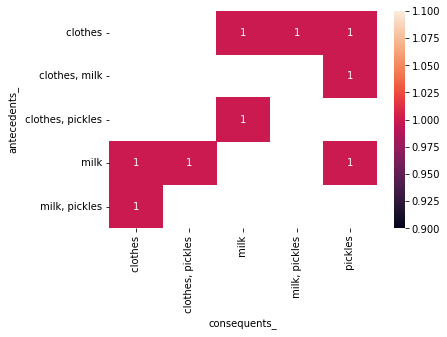

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['confidence']>= min_confidence].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Method 2

In [ ]:
market.head(3)

,transaction_id,items
0,t1,"noodles, pickles,milk"
1,t2,"noodles,cheese"
2,t3,"cheese, shoes"


### Prepare Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from apyori import apriori

In [ ]:
market.head(2)

,transaction_id,items
0,t1,"noodles, pickles,milk"
1,t2,"noodles,cheese"


In [ ]:
import collections

In [ ]:
records = collections.defaultdict(list)

for row in market.itertuples():
    # print(row.order_id)
    # print(row.product_name)
    row_list = row.items.strip().split(", ")
    for item in row_list:
      records[row.transaction_id].append(item)

In [ ]:
records

defaultdict(list,
            {'t1': ['noodles', 'pickles,milk'],
             't2': ['noodles,cheese'],
             't3': ['cheese', 'shoes'],
             't4': ['noodles', 'pickles', 'cheese'],
             't5': ['noodles', 'pickles', 'clothes', 'cheese', 'milk'],
             't6': ['pickles', 'clothes', 'milk'],
             't7': ['pickles', 'milk', 'clothes']})

### Generate Rules

In [ ]:
association_rules = apriori(records.values(), min_support=0.3,  min_confidence=0.8, min_length=3) #min_lift=3, min_confidence=0.8,
association_results = list(association_rules)
print(association_results)

print("items\n")

[RelationRecord(items=frozenset({'milk', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'milk'}), confidence=1.0, lift=2.3333333333333335), OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'clothes'}), confidence=1.0, lift=2.3333333333333335)]), RelationRecord(items=frozenset({'pickles', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'pickles'}), confidence=1.0, lift=1.75)]), RelationRecord(items=frozenset({'pickles', 'milk'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'pickles'}), confidence=1.0, lift=1.75)]), RelationRecord(items=frozenset({'pickles', 'milk', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'pickles', 'milk'}), co

In [ ]:
print(len(association_results))
print(association_results[0])

4
RelationRecord(items=frozenset({'milk', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'milk'}), confidence=1.0, lift=2.3333333333333335), OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'clothes'}), confidence=1.0, lift=2.3333333333333335)])


In [ ]:
association_results

[RelationRecord(items=frozenset({'milk', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'milk'}), confidence=1.0, lift=2.3333333333333335), OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'clothes'}), confidence=1.0, lift=2.3333333333333335)]),
 RelationRecord(items=frozenset({'pickles', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'pickles'}), confidence=1.0, lift=1.75)]),
 RelationRecord(items=frozenset({'pickles', 'milk'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'pickles'}), confidence=1.0, lift=1.75)]),
 RelationRecord(items=frozenset({'pickles', 'milk', 'clothes'}), support=0.42857142857142855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clothes'}), items_add=frozenset({'pickles', 'milk'}),

In [ ]:
i =1
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule",i, ': '+  items[0] + " -> " + items[1] )
    i += 1

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule 1 : milk -> clothes
Support: 0.42857142857142855
Confidence: 1.0
Lift: 2.3333333333333335
Rule 2 : pickles -> clothes
Support: 0.42857142857142855
Confidence: 1.0
Lift: 1.75
Rule 3 : pickles -> milk
Support: 0.42857142857142855
Confidence: 1.0
Lift: 1.75
Rule 4 : pickles -> milk
Support: 0.42857142857142855
Confidence: 1.0
Lift: 2.3333333333333335
